In [1]:
library(monocle3)
library(MAESTRO)
library(Seurat)
library(ggplot2)
library(dplyr)

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with


In [20]:
expression_matrix <- read.csv('example/small_HSC/script_pseudotime/score.txt', sep='\t', row.names = 1)

In [75]:
cell_metadata

,orig.ident,nCount_ATAC,nFeature_ATAC,ATAC_snn_res.0.6,seurat_clusters,ident,assign.celltype
,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>
singles-BM0828-MPP-frozen-151103-26,MPP-BM0828-151103-26,1554,1437,2,2,2,MPP
singles-BM0828-HSC-fresh-151027-66,HSC-BM0828-151027-66,8973,7505,2,2,2,HSC
singles-BM0828-GMP-151027-23,GMP-BM0828-151027-23,5156,4741,0,0,0,GMP
singles-BM0828-MPP-frozen-151103-12,MPP-BM0828-151103-12,8813,7163,1,1,1,MPP
singles-BM0828-CLP-frozen-151103-48,CLP-BM0828-151103-48,8268,6121,2,2,2,CLP
singles-BM0828-LMPP-frozen-151105-78,LMPP-BM0828-151105-78,13934,11526,2,2,2,LMPP
singles-BM0828-HSC-frozen-151027-51,HSC-BM0828-151027-51,19843,14904,2,2,2,HSC
singles-BM0828-HSC-frozen-151027-65,HSC-BM0828-151027-65,6952,5798,2,2,2,HSC
singles-BM0828-GMP-151027-56,GMP-BM0828-151027-56,4788,4487,0,0,0,GMP


In [12]:
cell_metadata <- read.csv('example/small_HSC/script_pseudotime/meta_data.txt', sep='\t', row.names = 1)

In [16]:
gene_annotation <- read.csv('example/small_HSC/script_pseudotime/feature.txt', sep='\t', row.names = 1)

In [66]:
cds <- new_cell_data_set(t(as.matrix(expression_matrix)),
                         cell_metadata = cell_metadata,
                         gene_metadata = NULL)

Warning message in new_cell_data_set(t(as.matrix(expression_matrix)), cell_metadata = cell_metadata, :
"Warning: gene_metadata must contain a column verbatim named 'gene_short_name' for certain functions."
Warning message in log(cell_total):
"产生了NaNs"


In [67]:
## Step 1: Normalize and pre-process the data
cds <- preprocess_cds(cds, num_dim = 50)
## Step 3: Reduce the dimensions using UMAP
cds <- reduce_dimension(cds, preprocess_method="PCA")
## Step 4: Cluster the cells
cds <- cluster_cells(cds)
## Step 5: Learn a graph
cds <- learn_graph(cds)

Warning message in normalize_expr_data(cds, norm_method, pseudo_count):
"产生了NaNs"


  |======================================================================| 100%
  |======================================================================| 100%


In [68]:
## Step 6: Order cells
get_earliest_principal_node <- function(cds, time_bin="HSC"){
  cell_ids <- which(colData(cds)[, "assign.celltype"] == time_bin)
  
  closest_vertex <-
    cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
    igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
                                                              (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}

In [69]:
cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds))

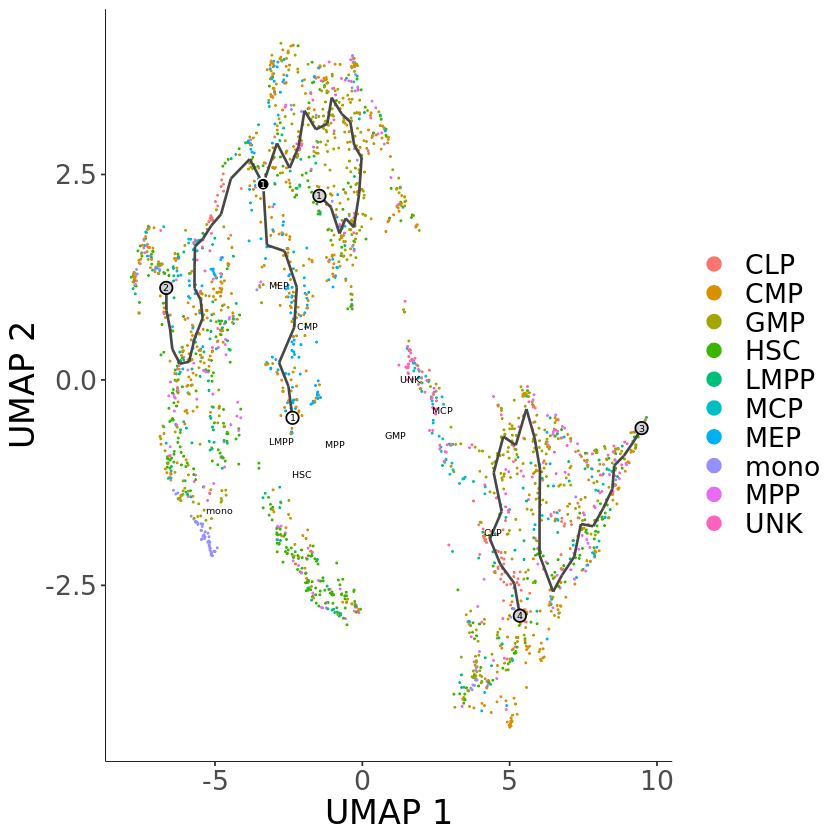

In [70]:
plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "assign.celltype") +
theme(legend.position="right", legend.title = element_blank(), text = element_text(family = 'Arial', face = NULL, colour = NULL, size = 20, hjust = NULL, vjust = NULL, angle = NULL, lineheight = NULL) )

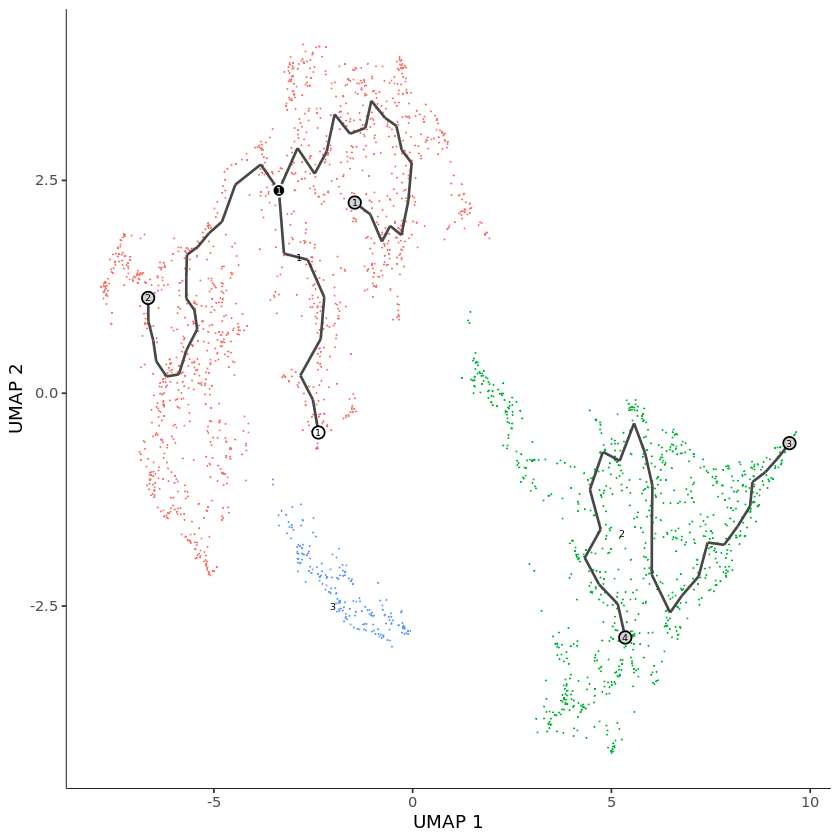

In [73]:
plot_cells(cds, color_cells_by = "cluster")

In [ ]:
?plot_cells

In [ ]:
#infer the differention trajectory lineage by Monocle3
```{r}
library(monocle3)
library(MAESTRO)
library(Seurat)
library(ggplot2)
library(dplyr)
setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK")
TNK_Seurat=readRDS("CCA_TNK_repca_cluster.rds")
which(TNK_Seurat@meta.data$sample =="P08_OSF")
Idents(TNK_Seurat)=as.vector(unlist(Idents(TNK_Seurat)))
names(Idents(TNK_Seurat))=rownames(TNK_Seurat@meta.data)
which(names(Idents(TNK_Seurat)) != rownames(TNK_Seurat@meta.data) )

#CD8T_Seurat=subset(TNK_Seurat,idents=c(2,5,7,8,16,18,20,24,9,10))
index=which(as.vector(unlist(TNK_Seurat@meta.data$seurat_clusters)) %in% c(2,5,7,8,16,18,20,24,9,10))
#CD8T_Seurat=FindVariableFeatures(CD8T_Seurat,mean.cutoff=c(0.125,3),nfeatures=500)
#Idents(TNK_Seurat)[1:5]

#expmat=GetAssayData(CD8T_Seurat)[VariableFeatures(CD8T_Seurat),]
expmat=GetAssayData(TNK_Seurat)
cell_metadata=TNK_Seurat@meta.data[index,]
expmat=expmat[,index]
expmat=as.matrix(expmat)
index=which(rowMeans(expmat) > 0.0125)
expmat=expmat[index,]

gene_metadata=rownames(expmat)
gene_metadata=as.data.frame(gene_metadata)
rownames(gene_metadata)=rownames(expmat)
colnames(gene_metadata)="gene_short_name"

#combined the cytotoxic score and exhuasted score
cytotoxic_score=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Signature_score/Cytotoxic_score_CD8T.rds")
exhuasted_score=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Signature_score/Exhuastion_score_CD8T.rds")

#due to the error lable of p08
exhuasted_score$new_sample=exhuasted_score$sample
tumor_index=which(exhuasted_score$sample == "P08_OSF")
osf_index=which(exhuasted_score$sample == "P08_Tumor")
exhuasted_score$new_sample[tumor_index]="P08_Tumor"
exhuasted_score$new_sample[osf_index]="P08_OSF"
exhuasted_score$source=unlist(lapply(strsplit(exhuasted_score$new_sample,"_"),function(x) x[2]))
cell_id=unlist(lapply(strsplit(rownames(exhuasted_score),"@"),function(x) x[2]))
sample_cell=paste(exhuasted_score$new_sample,cell_id,sep = "@")
rownames(exhuasted_score)=sample_cell
rownames(cytotoxic_score)=sample_cell

cell_metadata=data.frame(cell_metadata,Exhuasted_score=as.vector(unlist(exhuasted_score$Exhuastion_HAVCR21)),Cytotoxic_score=as.vector(unlist(cytotoxic_score$Cytotoxic_GZMK1)))
#which(rownames(cell_metadata) != rownames(exhuasted_score))

cell_metadata$cancer_con=cell_metadata$source
cell_metadata$cancer_con[which(cell_metadata$cancer_con %in% c("OLK","OLP","OSF"))]="Precancerous"
colnames(expmat)=rownames(cell_metadata)
cds <- new_cell_data_set(expmat,
                         cell_metadata = cell_metadata,
                         gene_metadata = gene_metadata)

## Step 1: Normalize and pre-process the data
cds <- preprocess_cds(cds, num_dim = 100)
## Step 3: Reduce the dimensions using UMAP
cds <- reduce_dimension(cds,preprocess_method="PCA")
## Step 4: Cluster the cells
cds <- cluster_cells(cds)
## Step 5: Learn a graph
cds <- learn_graph(cds)

## Step 6: Order cells
get_earliest_principal_node <- function(cds, time_bin="Naïve CD8 T"){
  cell_ids <- which(colData(cds)[, "curated_anno"] == time_bin)
  
  closest_vertex <-
    cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
    igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
                                                              (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}
cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds))

setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/Mean0125")
p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "curated_anno")+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_cell_type.pdf",p,width = 5,height = 4)



p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "cytotoxic_score$Cytotoxic_GZMK1")+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_cytotoxic_score.pdf",p,width = 5,height = 4)

p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "exhuasted_score$Exhuastion_HAVCR21")+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_exhuasted_score.pdf",p,width = 5,height = 4)


p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "sample",show_trajectory_graph=F)+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_sample.pdf",p,width = 5,height = 4)


p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "source",show_trajectory_graph=F)+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_source.pdf",p,width = 5,height = 4)

p=plot_cells(cds, label_groups_by_cluster=F,cell_size=0.5,color_cells_by = "cancer_con",show_trajectory_graph=F)+theme(legend.position="right",legend.title = element_blank())
ggsave("Monocle3_Differention_Traj_CD8T_cancer_con.pdf",p,width = 5,height = 4)

p=plot_cells(cds,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           graph_label_size=1.5)

ggsave("Monocle3_Differention_Traj_CD8T_pseudotime.pdf",p,width = 5,height = 4)

saveRDS(cds,file="Monocel3_CD8T_trajectory_object.rds")
```



#infer the differention trajectory lineage by Monocle2
```{r}
library(monocle)
library(MAESTRO)
library(Seurat)
library(ggplot2)
library(dplyr)
setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK")
TNK_Seurat=readRDS("CCA_TNK_repca_cluster.rds")

TNK_Seurat@meta.data$sample[81017,]
which(TNK_Seurat@meta.data$sample =="P08_OSF")


#CD8T_Seurat=subset(TNK_Seurat,idents=c(2,5,7,8,16,18,20,24,9,10))
index=which(as.vector(unlist(TNK_Seurat@meta.data$seurat_clusters)) %in% c(2,5,7,8,16,18,20,24,9,10))

#CD8T_Seurat=FindVariableFeatures(CD8T_Seurat,mean.cutoff=c(0.125,3),nfeatures=500)
#Idents(TNK_Seurat)[1:5]

#expmat=GetAssayData(CD8T_Seurat)[VariableFeatures(CD8T_Seurat),]
#DefaultAssay(TNK_Seurat)<-"RNA"
expmat=GetAssayData(TNK_Seurat)
cell_metadata=TNK_Seurat@meta.data[index,]
expmat=expmat[,index]
#cell_metadata=Myeloid_Seurat@meta.data

expmat=as.matrix(expmat)
index=which(rowMeans(expmat) > 0)
length(index)
expmat=expmat[index,]





gene_metadata=rownames(expmat)
gene_metadata=as.data.frame(gene_metadata)
rownames(gene_metadata)=rownames(expmat)
colnames(gene_metadata)="gene_short_name"

#combined the cytotoxic score and exhuasted score
#cytotoxic_score=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Signature_score/Cytotoxic_score_CD8T.rds")
#exhuasted_score=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Signature_score/Exhuastion_score_CD8T.rds")

#due to the error lable of p08
exhuasted_score$new_sample=exhuasted_score$sample
tumor_index=which(exhuasted_score$sample == "P08_OSF")
osf_index=which(exhuasted_score$sample == "P08_Tumor")
exhuasted_score$new_sample[tumor_index]="P08_Tumor"
exhuasted_score$new_sample[osf_index]="P08_OSF"
exhuasted_score$source=unlist(lapply(strsplit(exhuasted_score$new_sample,"_"),function(x) x[2]))
cell_id=unlist(lapply(strsplit(rownames(exhuasted_score),"@"),function(x) x[2]))
sample_cell=paste(exhuasted_score$new_sample,cell_id,sep = "@")
rownames(exhuasted_score)=sample_cell
rownames(cytotoxic_score)=sample_cell

cell_metadata=data.frame(cell_metadata,Exhuasted_score=as.vector(unlist(exhuasted_score$Exhuastion_HAVCR21)),Cytotoxic_score=as.vector(unlist(cytotoxic_score$Cytotoxic_GZMK1)))
#which(rownames(cell_metadata) != rownames(exhuasted_score))

cell_metadata$cancer_con=cell_metadata$source
cell_metadata$cancer_con[which(cell_metadata$cancer_con %in% c("OLK","OLP","OSF"))]="Precancerous"
colnames(expmat)=rownames(cell_metadata)

pd <- new("AnnotatedDataFrame", data = cell_metadata)
fd <- new("AnnotatedDataFrame", data = gene_metadata)

#cds <- newCellDataSet(expmat, phenoData = pd, featureData = fd)
colnames(expmat)=rownames(cell_metadata)

cds <- newCellDataSet(as(expmat, "sparseMatrix"),
                phenoData = pd,
                featureData = fd)



setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/")





#disp_table <- dispersionTable(cds)
#ordering_genes <- subset(disp_table, mean_expression >= 0.05)
cds <- estimateSizeFactors(cds)
cds=estimateDispersions(cds)
cds <- setOrderingFilter(cds, ordering_genes)
cds <- reduceDimension(cds)
saveRDS(cds,file="/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/AssayRNA_more0_monocle.rds")

cds=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/AssayRNA_more0_monocle.rds")
cds=ds
cds <- orderCells(cds)
plot_cell_trajectory(cds, color_by = "curated_anno")
#cds <- clusterCells(cds, num_clusters = 3)

#setwd("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/Monocle_Mean0125")

cds=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/Monocle2_relative2abs/CD8T_Monocle2_traject_cds.rds")

p=plot_cell_trajectory(cds, color_by = "curated_anno",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_cell_type.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "curated_anno_gene",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_curated_anno_gene.pdf",p,width = 8,height = 4)

p=plot_cell_trajectory(cds, color_by = "Pseudotime",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_pseudotime.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "Pseudotime",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_pseudotime.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "Cytotoxic_score",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_Cytotoxic_score.pdf",p,width = 5,height = 4)
p=plot_cell_trajectory(cds, color_by = "Exhuasted_score",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_Exhuasted_score.pdf",p,width = 5,height = 4)
p=plot_cell_trajectory(cds, color_by = "State",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F)
ggsave("Monocle3_Differention_Traj_CD8T_State.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "curated_anno",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F) +
    facet_wrap(~curated_anno, nrow = 1)
ggsave("Monocle3_Differention_Traj_CD8T_cell_type_split.pdf",p,width = 5,height = 4)

p=plot_cell_trajectory(cds, color_by = "source",cell_size=0.5,show_tree = F,show_backbone=F,show_branch_points=F) +
    facet_wrap(~source, nrow = 1)
ggsave("Monocle3_Differention_Traj_CD8T_source_split.pdf",p,width = 7,height = 4)

saveRDS(cds,file="Monocel2_CD8T_trajectory_object.rds")

cds=readRDS("/mnt/Storage2/home/hanya/project/Carcinogenesis/scRNAseq/Without_P12OLP/CCA_result/Nfeatures5000_includingInteract_CCA/Seperate_cell_lineage/TNK/Differeential_trajectory/Monocle_Mean0125/Monocel2_CD8T_HVGS2000_trajectory_object.rds")




#数量级不成正比，所以如果
     
index=which(colMeans(expmat[c(match("CD8A",rownames(expmat)),match("CD8B",rownames(expmat))),]) ==0 )
#i=only 914 point will not signaficant influence on the result
```